# Trabalho de I.A

Universidade: UFC - Universidade Federal do Ceará
Curso: Ciência da Computação

Alunos:
- Paulo Henrique Diniz de Lima Alencar
- Alysson Lucas Pinheiro

## 1. Escolha do problema e base de dados:

Prever a popularidade da música é o objetivo principal. Assim, com base na dançabilidade, energia, acústica, instrumentalidade ou vivacidade, podemos buscar construir um modelo de regressão para prever a popularidade da música, como base em uma ou mais características/preditores.

## Workflow

### 1. Carregamento do dataset:

In [84]:
import os

In [85]:
DIRNAME = './data-explorer'
FILENAME_DATASET = 'song_data.csv'

In [86]:
PATH_FILENAME = os.path.join(DIRNAME, FILENAME_DATASET)

In [87]:
PATH_FILENAME

'./data-explorer/song_data.csv'

In [88]:
import pandas as pd
import numpy as np

In [89]:
# Carrega o conjunto de dados para um dataframe
dataset = pd.read_csv(PATH_FILENAME)

In [90]:
# Mostra as 10 primeiras linhas do dataframe
dataset.head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,80,235893,0.008950,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
6,Last Resort,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.001480,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374


### 2. Informações básicas sobre o dataset:

In [91]:
# Dataframe possui 18.835 linhas e 15 colunas
print(f'shape(linhas, colunas): {dataset.shape}')

shape(linhas, colunas): (18835, 15)


In [92]:
# Algumas informações como: tamanho ocupado pelo df, tipo de dados das colunas...
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [93]:
# Gera estatísticas descritivas
dataset.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [94]:
dataset.describe(include='all')

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
unique,13070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Better,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,NaN,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,NaN,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,NaN,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,NaN,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000


### 3. Análise e visualização dos dados

#### 3.1 Teoria útil:

1. Regressão linear é um tipo básico e comumente usado de análise preditiva;

2. Utiliza uma abordagem estatística para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes (variável dependente e variáveis independentes são dois termos importantes para esse nosso projeto); 

3. O caso de uma variável independente é chamado de regressão linear simples, enquanto para mais de uma variável independente, o método é conhecido como regressão linear múltipla.

#### 3.2 Variável dependente e Variáveis independentes:

* Variável dependente - chamada de 'variável de resultado'.
* Variável(eis) independente(s) - geralmente chamadas de 'características', 'preditores', 'covariáveis'.

Obs: essa definição é importante, pois na modelagem estatística, a análise de regressão é uma série de processos estatísticos para estimar as relações entre uma variável dependente e uma ou mais variáveis independentes.

* Exemplo visual:

![Exemplo Visual](./img/features-label.png)
Fonte: https://developers.google.com/machine-learning/intro-to-ml?hl=pt-br

### 4. Nosso problema:

1. Queremos prever a popularidade de uma música com base em uma ou várias de suas características;
2. Nesse caso, dançabilidade, energia, acústica, instrumentalidade, vivacidade, etc. podem ser algumas de nossas variáveis INDEPENDENTES (features);
3. Já a popularidade da música é a nossa variável DEPENDENTE (label);

In [95]:
dataset.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


### 4.1 Nosso primeiro modelo - Limpeza dos dados:

In [118]:
df_name_popularity_danceability = dataset[['song_name', 'song_popularity', 'danceability']].copy()

In [119]:
df_name_popularity_danceability.head()

,song_name,song_popularity,danceability
0,Boulevard of Broken Dreams,73,0.496
1,In The End,66,0.542
2,Seven Nation Army,76,0.737
3,By The Way,74,0.451
4,How You Remind Me,56,0.447


In [120]:
columns_rename = {'song_name': 'nome_da_msc', 'song_popularity': 'popularidade', 'danceability': 'dançabilidade'}
df_name_popularity_danceability.rename(columns=columns_rename, inplace=True)
df_name_popularity_danceability.head()

,nome_da_msc,popularidade,dançabilidade
0,Boulevard of Broken Dreams,73,0.496
1,In The End,66,0.542
2,Seven Nation Army,76,0.737
3,By The Way,74,0.451
4,How You Remind Me,56,0.447


In [121]:
# Definindo o label (rótulo) e o feature (recurso)
label = 'popularidade'
feature = 'dançabilidade'

In [122]:
df_popularity_danceability = df_name_popularity_danceability[[label, feature]].copy()

In [123]:
# Esse é o df que vou utilizar para treinar e testar meu modelo
df_popularity_danceability.head()

,popularidade,dançabilidade
0,73,0.496
1,66,0.542
2,76,0.737
3,74,0.451
4,56,0.447


In [124]:
df_popularity_danceability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   popularidade   18835 non-null  int64  
 1   dançabilidade  18835 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 294.4 KB


In [125]:
# Armazenando as qtd's de linhas e colunas do df antes da limpeza
row_original, column_original = df_popularity_danceability.shape
row_original, column_original

(18835, 2)

In [126]:
# Verificando se temos valores null
df_popularity_danceability.isnull().sum()

popularidade     0
dançabilidade    0
dtype: int64

In [127]:
# Vamos remover as linhas do nosso dataframe onde a popularidade é 0
df_popularity_danceability = df_popularity_danceability.loc[~(df_popularity_danceability.popularidade == 0)]

In [128]:
# Vamos remover as linhas do nosso dataframe onde a dançabilidade é 0
df_popularity_danceability = df_popularity_danceability.loc[~(df_name_popularity_danceability.dançabilidade == 0)]

In [129]:
# Shape após as remoções feita acima
df_popularity_danceability.shape

(18562, 2)

In [130]:
df_popularity_danceability.describe()

,popularidade,dançabilidade
count,18562.000000,18562.000000
mean,53.768559,0.633192
std,21.098821,0.156434
min,1.000000,0.059400
25%,41.000000,0.533000
50%,56.000000,0.644000
75%,69.000000,0.748000
max,100.000000,0.987000


In [131]:
# Quantidade de valores únicos em cada coluna
df_popularity_danceability.nunique()

popularidade     100
dançabilidade    847
dtype: int64

In [132]:
# Quantidade de linhas duplicadas 
df_popularity_danceability.duplicated().sum()

6314

In [133]:
# Remove as linhas duplicadas mantendo as primeiras ocorrências
df_popularity_danceability.drop_duplicates(keep='first', inplace=True)

In [134]:
# Agora temos 0 linhas duplicadas
df_popularity_danceability.duplicated().sum()

0

In [135]:
# O shape do nosso df atualmente é (linhas, colunas)
df_popularity_danceability.shape

(12248, 2)

In [149]:
# Removendo Outliers
Q1 = df_popularity_danceability.quantile(0.25)
Q3 = df_popularity_danceability.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

flag_1 = df_popularity_danceability >= lower_limit 
flag_2 = df_popularity_danceability <= upper_limit

df_popularity_danceability = df_popularity_danceability[flag_1 & flag_2].dropna()

In [151]:
# Shape após remover Outliers
df_popularity_danceability.shape

(12180, 2)

### 4.2 Nosso primeiro modelo - visualizando nossas dados limpos:

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

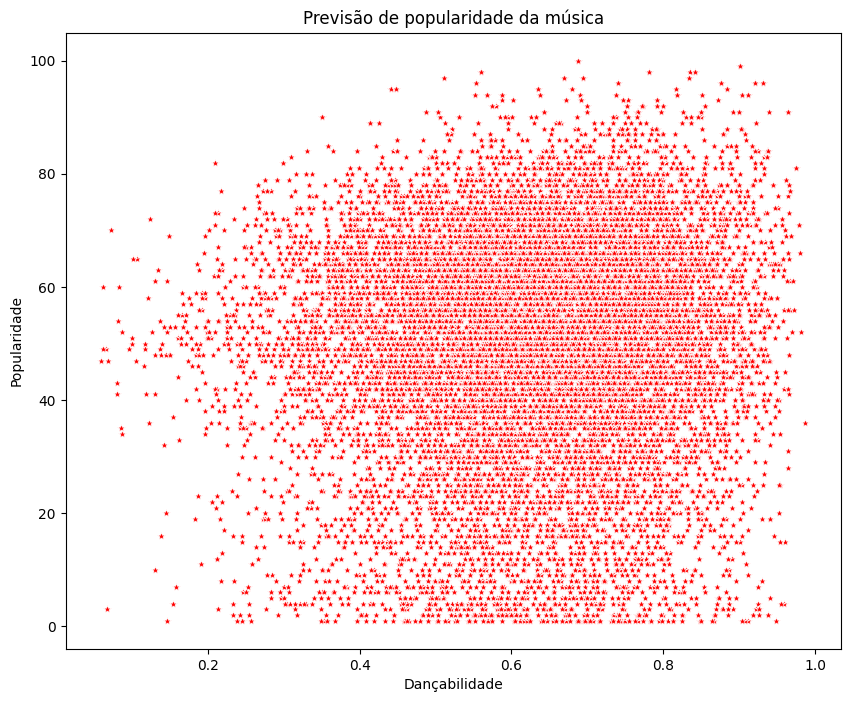

In [71]:
plt.figure(figsize=(10, 8))
axis_x = df_popularity_danceability['dançabilidade']
axis_y = df_popularity_danceability['popularidade']
sns.scatterplot(x=axis_x, y=axis_y, color='red', marker='*')
plt.xlabel('Dançabilidade')
plt.ylabel('Popularidade')
plt.title('Previsão de popularidade da música')
plt.show()